In [1]:
import pandas as pd

In [2]:
import yfinance as yf
import datetime as dt
# Define the ticker and date range
#The ticker symbol is used by traders and investors to identify and trade the stock in the market.
#In the Yahoo Finance API (yfinance), you use the ticker symbol to specify which stock's data you want to download.
ticker = "RELIANCE.NS"
start_date =dt.datetime(2022,6,1)
end_date =dt.datetime(2023,1,28)
# Download historical stock data
data = yf.download(ticker, start=start_date, end=end_date)
# Display the data
print(data)

[*********************100%%**********************]  1 of 1 completed

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2022-06-01  2431.458008  2450.748779  2414.751709  2430.719727  2414.286377   
2022-06-02  2431.181152  2522.050537  2431.181152  2514.528076  2497.528076   
2022-06-03  2532.711182  2600.413086  2530.864990  2565.477539  2548.133057   
2022-06-06  2565.939209  2597.321045  2539.910400  2554.447754  2537.177979   
2022-06-07  2556.616699  2576.184326  2540.141357  2559.247314  2541.945068   
...                 ...          ...          ...          ...          ...   
2023-01-20  2284.424316  2284.424316  2249.581055  2254.565186  2246.629150   
2023-01-23  2260.426270  2276.301758  2238.274170  2243.166016  2235.270020   
2023-01-24  2252.119141  2255.488037  2203.523193  2229.921143  2222.071777   
2023-01-25  2226.690674  2228.767334  2196.739258  2199.092773  2191.352051   
2023-01-27  2200.800537  2203.523193  2133.652100  2

In [3]:
stk_data=data[["Open","High","Low","Close"]]

In [4]:
stk_data

,Open,High,Low,Close
Date,,,,
2022-06-01,2431.458008,2450.748779,2414.751709,2430.719727
2022-06-02,2431.181152,2522.050537,2431.181152,2514.528076
2022-06-03,2532.711182,2600.413086,2530.864990,2565.477539
2022-06-06,2565.939209,2597.321045,2539.910400,2554.447754
2022-06-07,2556.616699,2576.184326,2540.141357,2559.247314
...,...,...,...,...
2023-01-20,2284.424316,2284.424316,2249.581055,2254.565186
2023-01-23,2260.426270,2276.301758,2238.274170,2243.166016
2023-01-24,2252.119141,2255.488037,2203.523193,2229.921143


In [5]:
column="Close"

In [6]:
from sklearn.preprocessing import MinMaxScaler
Ms=MinMaxScaler()
data1=Ms.fit_transform(stk_data[[column]])
print("Len:",data1.shape)

Len: (166, 1)


In [7]:
training_size=round(len(data1) * 0.85)
print(training_size)
X_train=data1[:training_size]
X_test=data1[training_size:]
print("X_train Length:",X_train.shape)
print("X_test Length:",X_test.shape)
y_train=data1[:training_size]
y_test=data1[training_size:]
print("y_train Length:",y_train.shape)
print("y Length:",y_test.shape)

141
X_train Length: (141, 1)
X_test Length: (25, 1)
y_train Length: (141, 1)
y Length: (25, 1)


In [8]:
from sklearn.metrics import mean_squared_error
trends=['n','t','c','ct']
orders=[(0,0,1),(0,0,2)]
from statsmodels.tsa.arima.model import ARIMA
for td in trends:
        #print(td)
        #trendslist.append(td)
    #Order = ( 
    model = ARIMA(X_train,order=(0,0,2),trend=td,)
    model_fit = model.fit()
        # make prediction
    y_pred= model_fit.predict(len(X_train), len(data1)-1)
        #print(y_pred)
    #from sklearn.metrics import r2_score
    mse=mean_squared_error(y_test,y_pred,squared=False)
    from stockFunctions import rmsemape
    print("Trend={}".format(td))
    rmsemape(y_test,y_pred)
    print("************")

C:\Users\Admin\anaconda3\envs\timeseries\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Trend=n
RMSE-Testset: 0.36998807742348383
maPe-Testset: 0.947539894518416
************
Trend=t
RMSE-Testset: 0.44391411812293347
maPe-Testset: 2.604974980438266
************
Trend=c
RMSE-Testset: 0.17186386973890144
maPe-Testset: 1.150556355439
************
Trend=ct
RMSE-Testset: 0.19417475798700276
maPe-Testset: 1.2807045867676983
************


In [16]:
td='n'
model = ARIMA(X_train, order=(0,0,20),trend=td,)
model_fit = model.fit()
# make prediction
y_pred= model_fit.predict(len(X_train), len(data1)-1)
#print(y_pred)
#from sklearn.metrics import r2_score
mse=mean_squared_error(y_test,y_pred,squared=False)
from stockFunctions import rmsemape
print("Trend={}".format(td))
rmsemape(y_test,y_pred)
print("************")

C:\Users\Admin\anaconda3\envs\timeseries\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Admin\anaconda3\envs\timeseries\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trend=n
RMSE-Testset: 0.23601130683696617
maPe-Testset: 0.6701991476188285
************


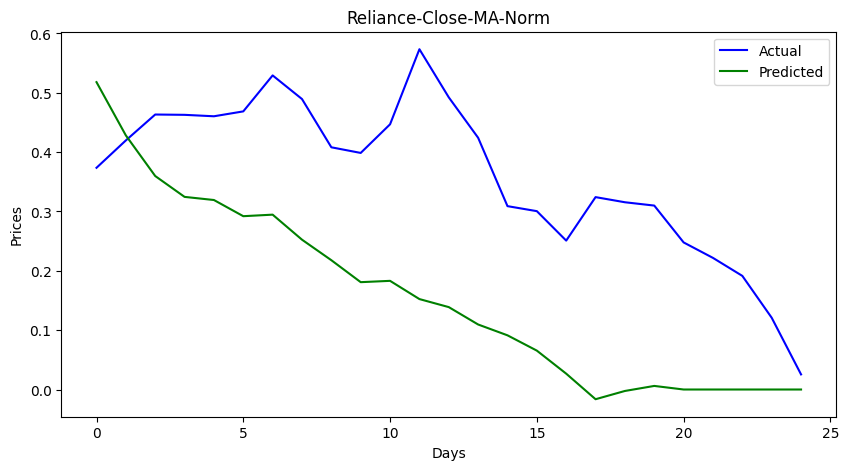

In [17]:
from stockFunctions import graph
graph(y_test,y_pred,"Actual","Predicted","Reliance-Close-MA-Norm","Days","Prices")

In [18]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(y_test,[column])
actual_stock_price_test_ori=Ms.inverse_transform(aTestNormTable)
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,[column])

In [19]:
from stockFunctions import conversionSingle
pTestNormTable=conversionSingle(y_pred,[column])
predicted_stock_price_test_ori=Ms.inverse_transform(pTestNormTable)
predicted_stock_price_test_oriP=conversionSingle(predicted_stock_price_test_ori,[column])

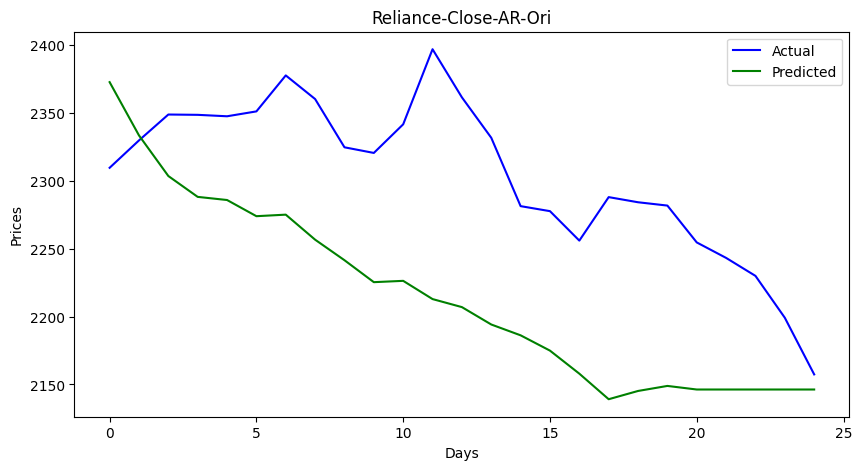

In [20]:
from stockFunctions import graph
graph(actual_stock_price_test_oriA,predicted_stock_price_test_oriP,"Actual","Predicted","Reliance-Close-AR-Ori","Days","Prices")

In [21]:
forecast=model_fit.predict(len(data1), len(data1)+3)

In [22]:
forecast

array([0., 0., 0., 0.])

In [23]:
from stockFunctions import conversionSingle
fTestNormTable=conversionSingle(forecast,["Closefore"])
forecast_stock_price_test_ori=Ms.inverse_transform(fTestNormTable)
forecast_stock_price_test_oriF=conversionSingle(forecast_stock_price_test_ori,["Closefore"])

In [24]:
forecast_stock_price_test_oriF

,Closefore
0,2146.251221
1,2146.251221
2,2146.251221
3,2146.251221
